<a href="https://colab.research.google.com/github/sezaionurlu/Customer-Segmentation-with-Unsupervised-Learning---FLO/blob/main/FLO_G%C3%B6zetimsiz_%C3%96%C4%9Frenme_%C4%B0le_M%C3%BC%C5%9Fteri_Segmentasyonu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

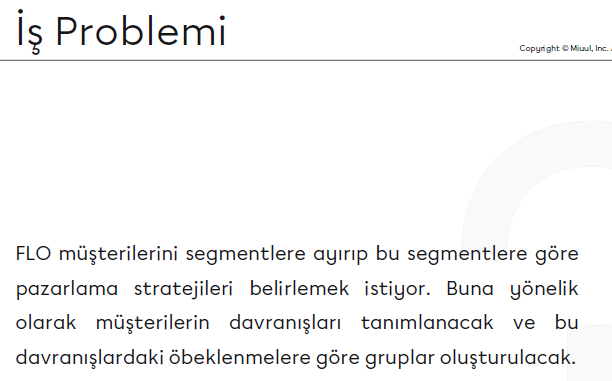

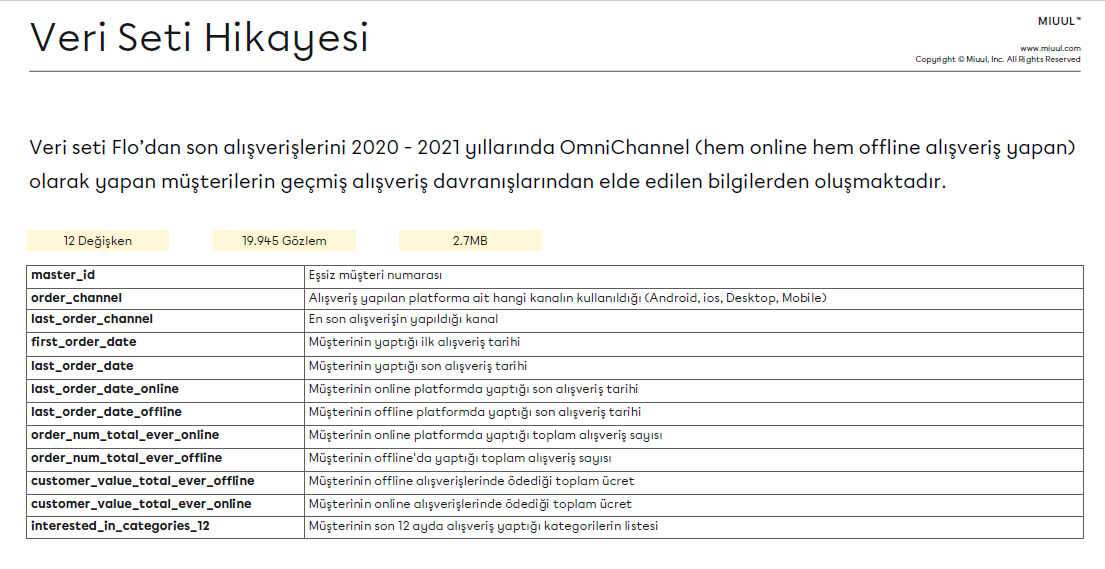

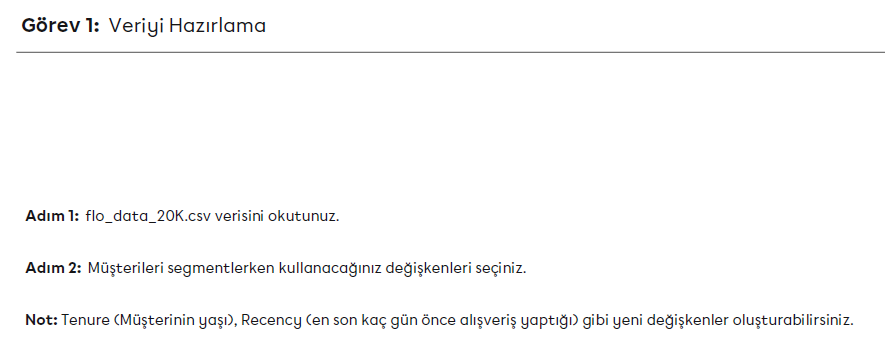

In [ ]:
!pip install yellowbrick

import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Adım 1:

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Veri Bilimi/Ödevler/3/flo_data_20k.csv')
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR]


In [ ]:
# Adım 2:

In [ ]:
# Omnichannel müşterilerin hem online'dan hemde offline platformlardan alışveriş yaptığını ifade etmektedir. Her bir müşterinin toplam
# alışveriş sayısı ve harcaması için yeni değişkenler oluşturulmalı.

In [ ]:
df['order_num_total_ever'] = df['order_num_total_ever_offline'] + df['order_num_total_ever_online']

df['customer_value_total_ever'] = df['customer_value_total_ever_offline'] + df['customer_value_total_ever_online']

In [ ]:
# Tarih ifade eden değişkenlerin tipini date'e çevrilmeli.

In [ ]:
# for col in df.loc[:,df.columns.str.contains('date')]:
#   df[col] = pd.to_datetime(df[col])

In [ ]:
def makedate (dataframe, column):
    for i in column:
        dataframe[i] = pd.to_datetime(dataframe[i])

In [ ]:
x=["first_order_date", "last_order_date", "last_order_date_online", "last_order_date_offline"]
makedate(df, x)

In [ ]:
# Müşteri özelinde Recency, Frequency ve Monetary metriklerini hesaplanması

In [ ]:
df['last_order_date'].max()

Timestamp('2021-05-30 00:00:00')

In [ ]:
import datetime as dt

In [ ]:
today_date = dt.datetime(2021,6 ,1 )

In [ ]:
# recency: Son satın alma - ilk satın alma farkı. Haftalık. (kullanıcı özelinde)
# T: Müşterinin yaşı. Haftalık. (analiz tarihinden ne kadar süre önce ilk satın alma yapılmış)
# frequency: tekrar eden toplam satın alma sayısı (frequency>1)
# monetary: satın alma başına ortalama kazanç

In [ ]:
cltv_df = df.groupby('master_id').agg(
    {'last_order_date': lambda first_order_date: (today_date - first_order_date.min()).days,
     'order_num_total_ever': lambda order_num_total_ever: order_num_total_ever.sum(),
     'customer_value_total_ever': lambda customer_value_total_ever: customer_value_total_ever.sum()})

In [ ]:
cltv_df.head()

,last_order_date,order_num_total_ever,customer_value_total_ever
master_id,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,10,5.0,776.07
00034aaa-a838-11e9-a2fc-000d3a38a36f,298,3.0,269.47
000be838-85df-11ea-a90b-000d3a38a36f,213,4.0,722.69
000c1fe2-a8b7-11ea-8479-000d3a38a36f,27,7.0,874.16
000f5e3e-9dde-11ea-80cd-000d3a38a36f,20,7.0,1620.33


In [ ]:
cltv_df.columns = ['T_weekly', 'frequency', 'monetary_cltv_avg']

cltv_df.head()

,T_weekly,frequency,monetary_cltv_avg
master_id,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,10,5.0,776.07
00034aaa-a838-11e9-a2fc-000d3a38a36f,298,3.0,269.47
000be838-85df-11ea-a90b-000d3a38a36f,213,4.0,722.69
000c1fe2-a8b7-11ea-8479-000d3a38a36f,27,7.0,874.16
000f5e3e-9dde-11ea-80cd-000d3a38a36f,20,7.0,1620.33


In [ ]:
(df['last_order_date'][0] - df['first_order_date'][1])

Timedelta('1479 days 00:00:00')

In [ ]:
cltv_df['recency_cltv_weekly'] = (df['last_order_date'] - df['first_order_date']).dt.days

In [ ]:
cltv_df.head()

,T_weekly,frequency,monetary_cltv_avg,recency_cltv_weekly
master_id,,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,10,5.0,155.214000,NaN
00034aaa-a838-11e9-a2fc-000d3a38a36f,298,3.0,89.823333,NaN
000be838-85df-11ea-a90b-000d3a38a36f,213,4.0,180.672500,NaN
000c1fe2-a8b7-11ea-8479-000d3a38a36f,27,7.0,124.880000,NaN
000f5e3e-9dde-11ea-80cd-000d3a38a36f,20,7.0,231.475714,NaN


In [ ]:
for i in range(0, len(cltv_df)):
  cltv_df['recency_cltv_weekly'][i] = (df['last_order_date'][i] - df['first_order_date'][i]).days

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
cltv_df.head()

,T_weekly,frequency,monetary_cltv_avg,recency_cltv_weekly
master_id,,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,10,5.0,155.214000,119.0
00034aaa-a838-11e9-a2fc-000d3a38a36f,298,3.0,89.823333,1469.0
000be838-85df-11ea-a90b-000d3a38a36f,213,4.0,180.672500,366.0
000c1fe2-a8b7-11ea-8479-000d3a38a36f,27,7.0,124.880000,11.0
000f5e3e-9dde-11ea-80cd-000d3a38a36f,20,7.0,231.475714,582.0


In [ ]:
cltv_df['monetary_cltv_avg'] = cltv_df['monetary_cltv_avg'] / cltv_df['frequency']
cltv_df['recency_cltv_weekly'] = cltv_df['recency_cltv_weekly'] / 7
cltv_df['T_weekly'] = cltv_df['T_weekly'] / 7

cltv_df.head()

,T_weekly,frequency,monetary_cltv_avg,recency_cltv_weekly
master_id,,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,1.428571,5.0,31.042800,17.000000
00034aaa-a838-11e9-a2fc-000d3a38a36f,42.571429,3.0,29.941111,209.857143
000be838-85df-11ea-a90b-000d3a38a36f,30.428571,4.0,45.168125,52.285714
000c1fe2-a8b7-11ea-8479-000d3a38a36f,3.857143,7.0,17.840000,1.571429
000f5e3e-9dde-11ea-80cd-000d3a38a36f,2.857143,7.0,33.067959,83.142857


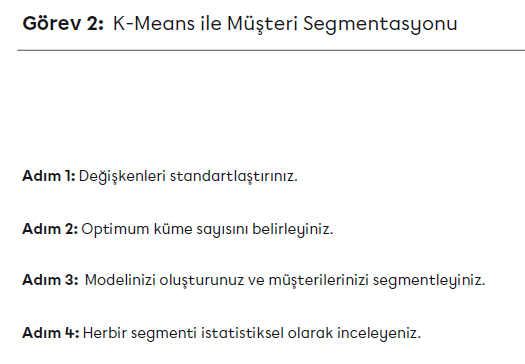

In [ ]:
# Adım 1:

In [ ]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

In [ ]:
sc = MinMaxScaler((0, 1))
df = sc.fit_transform(cltv_df)
df[0:5]

array([[0.02191781, 0.015     , 0.02352265, 0.03922215],
       [0.8109589 , 0.005     , 0.02267096, 0.4841793 ],
       [0.57808219, 0.01      , 0.03444263, 0.12063283],
       [0.06849315, 0.025     , 0.01331586, 0.00362558],
       [0.04931507, 0.025     , 0.02508826, 0.19182597]])

In [ ]:
# Adım 2:

In [ ]:
kmeans = KMeans()
ssd = []
K = range(1, 30)

In [ ]:
for k in K:
    kmeans = KMeans(n_clusters=k).fit(df)
    ssd.append(kmeans.inertia_)

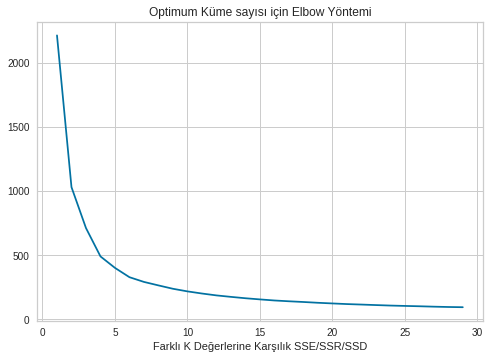

In [ ]:
plt.plot(K, ssd, "bx-")
plt.xlabel("Farklı K Değerlerine Karşılık SSE/SSR/SSD")
plt.title("Optimum Küme sayısı için Elbow Yöntemi")
plt.show()

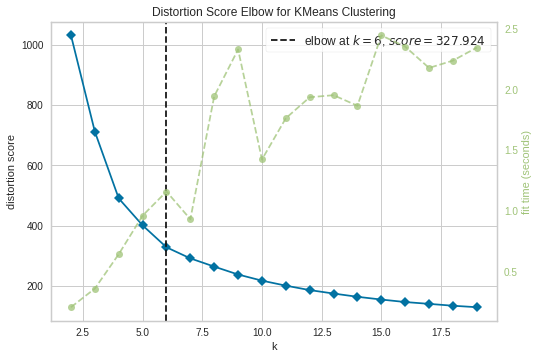

In [ ]:
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2, 20))
elbow.fit(df)
elbow.show()

In [ ]:
elbow.elbow_value_

6

In [ ]:
# Adım 3:

In [ ]:
kmeans = KMeans(n_clusters=elbow.elbow_value_).fit(df)

In [ ]:
kmeans.n_clusters

6

In [ ]:
kmeans.cluster_centers_

array([[0.07990823, 0.01840984, 0.0326665 , 0.16134082],
       [0.29746298, 0.01465032, 0.03319368, 0.16505293],
       [0.54974558, 0.01308782, 0.03513867, 0.16353449],
       [0.86900473, 0.01089239, 0.03534386, 0.16894839],
       [0.17236625, 0.01745156, 0.03241306, 0.58876267],
       [0.66597814, 0.01236517, 0.03541366, 0.60132765]])

In [ ]:
kmeans.labels_

array([0, 5, 2, ..., 2, 1, 3], dtype=int32)

In [ ]:
df[0:5]

array([[0.02191781, 0.015     , 0.02352265, 0.03922215],
       [0.8109589 , 0.005     , 0.02267096, 0.4841793 ],
       [0.57808219, 0.01      , 0.03444263, 0.12063283],
       [0.06849315, 0.025     , 0.01331586, 0.00362558],
       [0.04931507, 0.025     , 0.02508826, 0.19182597]])

In [ ]:
clusters_kmeans = kmeans.labels_

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Veri Bilimi/Ödevler/3/flo_data_20k.csv',index_col=0)

In [ ]:
df["cluster"] = clusters_kmeans

df.head()

,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,cluster
master_id,,,,,,,,,,,,
cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN],0
f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",5
69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]",2
1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]",0
d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR],0


In [ ]:
# Adım 4:

In [ ]:
cltv_df["cluster"] = clusters_kmeans

cltv_df.head()

,T_weekly,frequency,monetary_cltv_avg,recency_cltv_weekly,cluster
master_id,,,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,1.428571,5.0,31.042800,17.000000,0
00034aaa-a838-11e9-a2fc-000d3a38a36f,42.571429,3.0,29.941111,209.857143,5
000be838-85df-11ea-a90b-000d3a38a36f,30.428571,4.0,45.168125,52.285714,2
000c1fe2-a8b7-11ea-8479-000d3a38a36f,3.857143,7.0,17.840000,1.571429,0
000f5e3e-9dde-11ea-80cd-000d3a38a36f,2.857143,7.0,33.067959,83.142857,0


In [ ]:
cltv_df.groupby('cluster').agg(['mean', 'count', 'median'])

T_weekly                  frequency              monetary_cltv_avg  \
              mean count     median      mean count median              mean   
cluster                                                                        
0         4.452357  6078   4.000000  5.681968  6078    4.0         42.870649   
1        15.793847  4690  15.571429  4.930917  4690    4.0         43.540301   
2        28.949039  3919  28.285714  4.616739  3919    4.0         46.074088   
3        45.598104  2667  46.142857  4.178478  2667    3.0         46.333891   
4         9.272369  1702   8.714286  5.490012  1702    4.0         42.554947   
5        35.019926   889  33.571429  4.473566   889    3.0         46.437395   

                         recency_cltv_weekly                    
        count     median                mean count      median  
cluster                                                         
0        6078  32.774867           69.929723  6078   69.857143  
1        4690  34.484300           71.538715  4690   70.500000  
2        3919  36.919444           70.929683  3919   70.857143  
3        2667  37.190000           73.227061  2667   71.000000  
4        1702  33.022400          255.242740  1702  245.000000  
5         889  36.247500          260.728748   889  256.285714

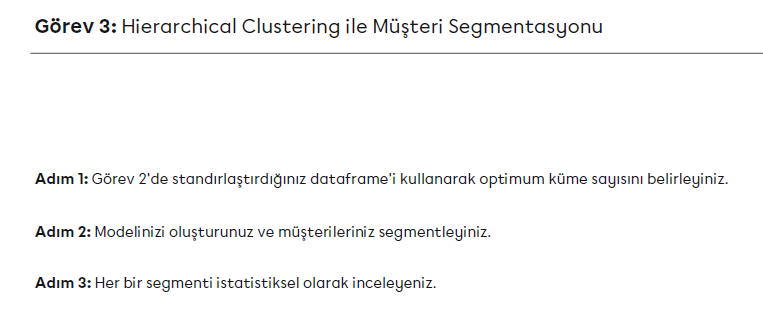

In [ ]:
cltv_df.head()

,T_weekly,frequency,monetary_cltv_avg,recency_cltv_weekly,cluster
master_id,,,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,1.428571,5.0,31.042800,17.000000,0
00034aaa-a838-11e9-a2fc-000d3a38a36f,42.571429,3.0,29.941111,209.857143,5
000be838-85df-11ea-a90b-000d3a38a36f,30.428571,4.0,45.168125,52.285714,2
000c1fe2-a8b7-11ea-8479-000d3a38a36f,3.857143,7.0,17.840000,1.571429,0
000f5e3e-9dde-11ea-80cd-000d3a38a36f,2.857143,7.0,33.067959,83.142857,0


In [ ]:
cltv_df.drop('cluster', axis=1, inplace=True)
  
cltv_df.head()

,T_weekly,frequency,monetary_cltv_avg,recency_cltv_weekly
master_id,,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,1.428571,5.0,31.042800,17.000000
00034aaa-a838-11e9-a2fc-000d3a38a36f,42.571429,3.0,29.941111,209.857143
000be838-85df-11ea-a90b-000d3a38a36f,30.428571,4.0,45.168125,52.285714
000c1fe2-a8b7-11ea-8479-000d3a38a36f,3.857143,7.0,17.840000,1.571429
000f5e3e-9dde-11ea-80cd-000d3a38a36f,2.857143,7.0,33.067959,83.142857


In [ ]:
sc = MinMaxScaler((0, 1))
df = sc.fit_transform(cltv_df)
df[0:5]

array([[0.02191781, 0.015     , 0.02352265, 0.03922215],
       [0.8109589 , 0.005     , 0.02267096, 0.4841793 ],
       [0.57808219, 0.01      , 0.03444263, 0.12063283],
       [0.06849315, 0.025     , 0.01331586, 0.00362558],
       [0.04931507, 0.025     , 0.02508826, 0.19182597]])

In [ ]:
hc_average = linkage(df, "average")

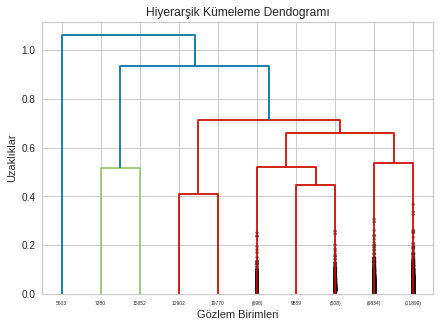

In [ ]:
plt.figure(figsize=(7, 5))
plt.title("Hiyerarşik Kümeleme Dendogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Uzaklıklar")
dendrogram(hc_average,
           truncate_mode="lastp",
           p=10,
           show_contracted=True,
           leaf_font_size=5)
plt.show()

In [ ]:
# Adım 2:

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
cluster = AgglomerativeClustering(n_clusters=5, linkage="average")

clusters = cluster.fit_predict(df)

In [ ]:
cltv_df["hi_cluster_no"] = clusters

In [ ]:
cltv_df["kmeans_cluster_no"] = clusters_kmeans

In [ ]:
cltv_df

,T_weekly,frequency,monetary_cltv_avg,recency_cltv_weekly,hi_cluster_no,kmeans_cluster_no
master_id,,,,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,1.428571,5.0,31.042800,17.000000,0,0
00034aaa-a838-11e9-a2fc-000d3a38a36f,42.571429,3.0,29.941111,209.857143,0,5
000be838-85df-11ea-a90b-000d3a38a36f,30.428571,4.0,45.168125,52.285714,0,2
000c1fe2-a8b7-11ea-8479-000d3a38a36f,3.857143,7.0,17.840000,1.571429,0,0
000f5e3e-9dde-11ea-80cd-000d3a38a36f,2.857143,7.0,33.067959,83.142857,0,0
...,...,...,...,...,...,...
fff1db94-afd9-11ea-b736-000d3a38a36f,26.142857,5.0,31.874800,41.142857,0,2
fff4736a-60a4-11ea-8dd8-000d3a38a36f,9.571429,2.0,79.717500,42.285714,0,0
fffacd34-ae14-11e9-a2fc-000d3a38a36f,36.714286,6.0,27.331111,88.714286,0,2


In [ ]:
cltv_df.groupby("hi_cluster_no").agg(["mean","count","median"])

T_weekly                     frequency                \
                    mean  count     median        mean  count median   
hi_cluster_no                                                          
0              19.189925  18733  16.000000    4.993968  18733    4.0   
1              19.498521   1207  15.000000    5.079536   1207    4.0   
2               3.928571      2   3.928571  166.500000      2  166.5   
3               5.000000      1   5.000000    4.000000      1    4.0   
4              38.928571      2  38.928571   99.500000      2   99.5   

              monetary_cltv_avg                     recency_cltv_weekly  \
                           mean  count       median                mean   
hi_cluster_no                                                             
0                     44.198222  18733    34.620400           81.253190   
1                     44.206123   1207    34.496250          312.728607   
2                      0.920361      2     0.920361          105.714286   
3                   1294.146250      1  1294.146250          156.571429   
4                      0.974847      2     0.974847           41.500000   

                                 kmeans_cluster_no                
               count      median              mean  count median  
hi_cluster_no                                                     
0              18733   73.571429          1.413548  18733    1.0  
1               1207  308.285714          4.385253   1207    4.0  
2                  2  105.714286          2.000000      2    2.0  
3                  1  156.571429          0.000000      1    0.0  
4                  2   41.500000          2.500000      2    2.5

In [ ]:
cltv_df.groupby("kmeans_cluster_no").agg(["mean","count","median"])

T_weekly                  frequency               \
                        mean count     median      mean count median   
kmeans_cluster_no                                                      
0                   4.452357  6078   4.000000  5.681968  6078    4.0   
1                  15.793847  4690  15.571429  4.930917  4690    4.0   
2                  28.949039  3919  28.285714  4.616739  3919    4.0   
3                  45.598104  2667  46.142857  4.178478  2667    3.0   
4                   9.272369  1702   8.714286  5.490012  1702    4.0   
5                  35.019926   889  33.571429  4.473566   889    3.0   

                  monetary_cltv_avg                  recency_cltv_weekly  \
                               mean count     median                mean   
kmeans_cluster_no                                                          
0                         42.870649  6078  32.774867           69.929723   
1                         43.540301  4690  34.484300           71.538715   
2                         46.074088  3919  36.919444           70.929683   
3                         46.333891  2667  37.190000           73.227061   
4                         42.554947  1702  33.022400          255.242740   
5                         46.437395   889  36.247500          260.728748   

                                    hi_cluster_no               
                  count      median          mean count median  
kmeans_cluster_no                                               
0                  6078   69.857143      0.000823  6078    0.0  
1                  4690   70.500000      0.000000  4690    0.0  
2                  3919   70.857143      0.001021  3919    0.0  
3                  2667   71.000000      0.001500  2667    0.0  
4                  1702  245.000000      0.437133  1702    0.0  
5                   889  256.285714      0.523060   889    1.0